# 🧠 Data Visualization For
In this notebook, we will:
- Use transfer learning (MobileNetV2) to feature extraction
- Extract features from the bottleneck layer
- Reduce them using PCA
- Visualize with matplotlib


Found 2000 files belonging to 2 classes.
49
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


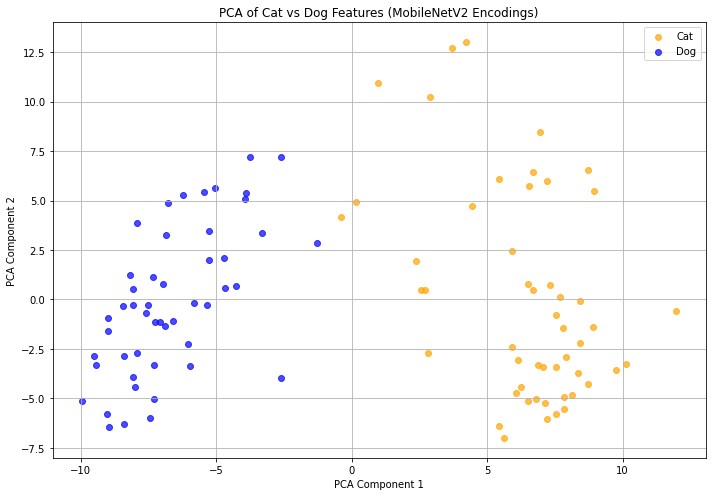

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import os

# Step 1: Download and extract dataset

# dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
# zip_path = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=dataset_url, extract=True)
train_dir = os.path.join("cats_and_dogs_filtered", "train")

# Step 2: Load dataset
IMG_SIZE = 160
BATCH_SIZE = 100

train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True  # For label-image consistency
)

# Step 3: Load a single batch
for batch_images, batch_labels in train_dataset.take(10):
    images = preprocess_input(batch_images)
    labels = batch_labels.numpy()

# Step 4: Load MobileNetV2
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                         include_top=False,
                         pooling='avg',
                         weights='imagenet')
base_model.trainable = False

print(sum(labels))
# Step 5: Get encodings
features = base_model.predict(images)

# Step 6: PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features)

# Step 7: Plot with proper legend handling
plt.figure(figsize=(10, 7))
cat_points = features_2d[labels == 0]
dog_points = features_2d[labels == 1]

plt.scatter(cat_points[:, 0], cat_points[:, 1], color='orange', label='Cat', alpha=0.7)
plt.scatter(dog_points[:, 0], dog_points[:, 1], color='blue', label='Dog', alpha=0.7)

plt.title("PCA of Cat vs Dog Features (MobileNetV2 Encodings)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
